In [1]:
import pandas as pd
import numpy as np
import numpy

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
print(df.shape)
df.head()

(400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
x = df.iloc[:,2:4].values

In [4]:
y = df.iloc[:,-1].values

In [5]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [7]:
print('X_test shape:',x_test.shape)
print('X_train shape:',x_train.shape)

X_test shape: (80, 2)
X_train shape: (320, 2)


# Method 1: sqrt

In [8]:
# KNN Classification

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier 

In [9]:
np.sqrt(x_train.shape[0])

17.88854381999832

In [10]:
k =17

In [11]:
knn = KNeighborsClassifier(n_neighbors=k)


#train model
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [12]:
y_pred = knn.predict(x_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(accuracy_score(y_test,y_pred)*100)

82.5


In [14]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1
0,50,2
1,12,16


In [15]:
accuracy = []

for i in range(1,17):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    accuracy.append(accuracy_score(y_test, knn.predict(x_test)))

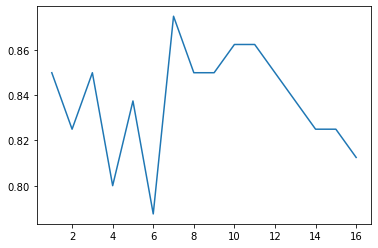

In [16]:
import matplotlib.pyplot as plt

plt.plot(range(1,17), accuracy)

In [17]:
knn = KNeighborsClassifier(n_neighbors  = 11)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [18]:
y_pred = knn.predict(x_test)

In [19]:
accuracy_score(y_test,y_pred)*100

86.25

In [23]:
def predict_output():
    age = int(input ('Enter Age '))
    salary = int(input ('Enter Salary '))
    
    x_new = np.array([[age],[salary]]).reshape(1,2)
    x_new = scaler.transform(x_new)
    
    if knn.predict(x_new)[0] == 0:
        return "Will not purchase" 
    else:
        return "Will purchase"

In [24]:
predict_output()

Enter Age 20
Enter Salary 21000


'Will not purchase'